List of all the datasets and parameters in kedro project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.manifold import TSNE
import umap
import time
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr
import math

In [5]:
all_datasets = catalog.list()
train_datasets = [name for name in all_datasets if name.endswith("_val")]
print(train_datasets)

['windows_90_val', 'pca_val', 'lle_val', 'umap_val', 'wavelet_val', 'fft_val', 'graph_val', 'tda_val', 'gaf_val', 'mtf_val', 'rp_val', 'gaf_clip_val', 'mtf_clip_val', 'rp_clip_val', 'gaf_dino_val', 'mtf_dino_val', 'rp_dino_val', 'gaf_resnet_val', 'mtf_resnet_val', 'rp_resnet_val']


In [6]:
all_items = catalog.list()
emb_names = [
    name for name in all_items
    if name.endswith("_train") and name != "windows_90_train"
]
train_window = catalog.load("windows_90_train")

[05/28/25 13:09:21] INFO     Loading data from windows_90_train (ParquetDataset)...             ]8;id=578860;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=637471;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.manifold import TSNE
import umap
import time
from scipy.spatial.distance import pdist, squareform
from scipy.stats import pearsonr

In [8]:
def evaluate_embeddings(embeddings, original_data, method='correlation'):
    """
    Evaluate how well the embeddings preserve the structure of the original data.
    
    Parameters:
    -----------
    embeddings : array-like
        Embedded representations
    original_data : array-like
        Original time series data
    method : str, default='correlation'
        Method to evaluate embeddings:
        - 'correlation': Correlation between distance matrices
        - 'reconstruction': Reconstruction error (if applicable)
        
    Returns:
    --------
    dict
        Dictionary of evaluation metrics
    """
    metrics = {}
    
    if method == 'correlation':
        # Flatten time series if needed
        if original_data.ndim > 2:
            orig_data_flat = original_data.reshape(original_data.shape[0], -1)
        else:
            orig_data_flat = original_data
            
        # Compute distance matrices
        orig_dist = squareform(pdist(orig_data_flat))
        embed_dist = squareform(pdist(embeddings))
        
        # Compute correlation
        r, p_value = pearsonr(orig_dist.flatten(), embed_dist.flatten())
        
        metrics['correlation'] = r
        metrics['p_value'] = p_value
        
    elif method == 'reconstruction':
        # This assumes there's a way to reconstruct the original data from embeddings
        # Implementation would depend on the specific embedding method
        pass
    
    return metrics

In [ ]:
rows = []
for emb_name in emb_names:
    emb = catalog.load(emb_name)
    metrics = evaluate_embeddings(emb, train_window, method='correlation')
    # add the embedding name for tracking
    metrics['embedding'] = emb_name
    rows.append(metrics)

[05/28/25 13:09:27] INFO     Loading data from pca_train (ParquetDataset)...                    ]8;id=427310;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=947814;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

[05/28/25 13:10:29] INFO     Loading data from lle_train (ParquetDataset)...                    ]8;id=908636;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=948836;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

[05/28/25 13:11:22] INFO     Loading data from umap_train (ParquetDataset)...                   ]8;id=53776;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=617203;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

[05/28/25 13:12:14] INFO     Loading data from wavelet_train (ParquetDataset)...                ]8;id=245020;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=111785;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

[05/28/25 13:13:13] INFO     Loading data from fft_train (ParquetDataset)...                    ]8;id=668680;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=728154;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

[05/28/25 13:14:19] INFO     Loading data from graph_train (ParquetDataset)...                  ]8;id=925406;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=654389;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

[05/28/25 13:15:05] INFO     Loading data from tda_train (ParquetDataset)...                    ]8;id=915830;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=735621;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

In [1]:
df_metrics = pd.DataFrame(rows).set_index('embedding')
df_metrics.style.background_gradient(subset=['correlation'])

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 df_metrics = pd.DataFrame(rows).set_index('embedding')                                       │
│   2 df_metrics.style.background_gradient(subset=['correlation'])                                 │
│   3                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'pd' is not defined

In [11]:
def plot_embedding(ax, embeddings, labels=None, method='tsne', title='Embedding Visualization'):
    """
    Visualize embeddings in 2D.
    
    Parameters:
    -----------
    embeddings : array-like
        Embedded representations
    labels : array-like, optional
        Labels for color-coding points
    method : str, default='tsne'
        Visualization method: 'tsne', 'umap', or 'pca'
    title : str, default='Embedding Visualization'
        Plot title
        
    Returns:
    --------
    matplotlib.figure.Figure
        The figure object
    """
    # 1) Reduce to 2D if needed
    if embeddings.shape[1] > 2:
        if method == 'tsne':
            reducer = TSNE(n_components=2, random_state=42)
        elif method == 'umap':
            reducer = umap.UMAP(n_components=2, random_state=42)
        elif method == 'pca':
            from sklearn.decomposition import PCA
            reducer = PCA(n_components=2, random_state=42)
        embed_2d = reducer.fit_transform(embeddings)
    else:
        embed_2d = embeddings

    # 2) Ensure DataFrame for indexing
    if not isinstance(embed_2d, pd.DataFrame):
        embed_2d = pd.DataFrame(embed_2d, columns=[0, 1])

    # 3) Scatter plot
    if labels is not None:
        unique = pd.unique(labels)
        colors = plt.cm.viridis(np.linspace(0, 1, len(unique)))
        for i, lab in enumerate(unique):
            mask = (labels == lab)
            ax.scatter(
                embed_2d.iloc[mask, 0],
                embed_2d.iloc[mask, 1],
                color=colors[i], label=str(lab),
                alpha=0.7, edgecolors='w', linewidths=0.5
            )
        ax.legend()
    else:
        ax.scatter(
            embed_2d.iloc[:, 0], embed_2d.iloc[:, 1],
            alpha=0.7, edgecolors='w', linewidths=0.5
        )

    # 4) Style
    ax.set_title(title)
    ax.set_xlabel(f'{method.upper()} 1')
    ax.set_ylabel(f'{method.upper()} 2')
    ax.grid(True, linestyle='--', alpha=0.7)


    
def visualize_embeddings_grid(embeddings_list, names, labels=None,
                              method='tsne', figsize=(15, 10), filename=None):
    """
    Create a grid of embedding visualizations in one figure.

    Parameters:
    -----------
    embeddings_list : list of array-like
        List of embedded representations
    names : list of str
        Titles for each subplot
    labels : array-like, optional
        Labels for color-coding points
    method : str, default='tsne'
        Visualization method: 'tsne', 'umap', or 'pca'
    figsize : tuple, default=(15, 10)
        Figure size
    filename : str, optional
        If provided, save the figure to this file

    Returns:
    --------
    matplotlib.figure.Figure
        The figure object
    """
    # Determine grid size
    n = len(embeddings_list)
    n_cols = int(math.ceil(math.sqrt(n)))
    n_rows = int(math.ceil(n / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    # Plot each embedding
    for i, emb in enumerate(embeddings_list):
        plot_embedding(
            axes[i], emb, labels=labels, method=method,
            title=names[i]
        )

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    return fig

In [12]:
# Get the first and last column of the DataFrame
start_vals = train_window.iloc[:, 0]
end_vals   = train_window.iloc[:, -1]

# builds up/down labels
labels = np.where(end_vals > start_vals, "Up", "Down")

[05/20/25 16:41:59] INFO     Loading data from pca_train (ParquetDataset)...                    ]8;id=402927;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=278858;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from lle_train (ParquetDataset)...                    ]8;id=174424;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=5392;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from umap_train (ParquetDataset)...                   ]8;id=192497;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=564636;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from wavelet_train (ParquetDataset)...                ]8;id=132193;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=83251;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from fft_train (ParquetDataset)...                    ]8;id=739617;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=22791;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from graph_train (ParquetDataset)...                  ]8;id=746810;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=990101;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from tda_train (ParquetDataset)...                    ]8;id=908160;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=579117;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

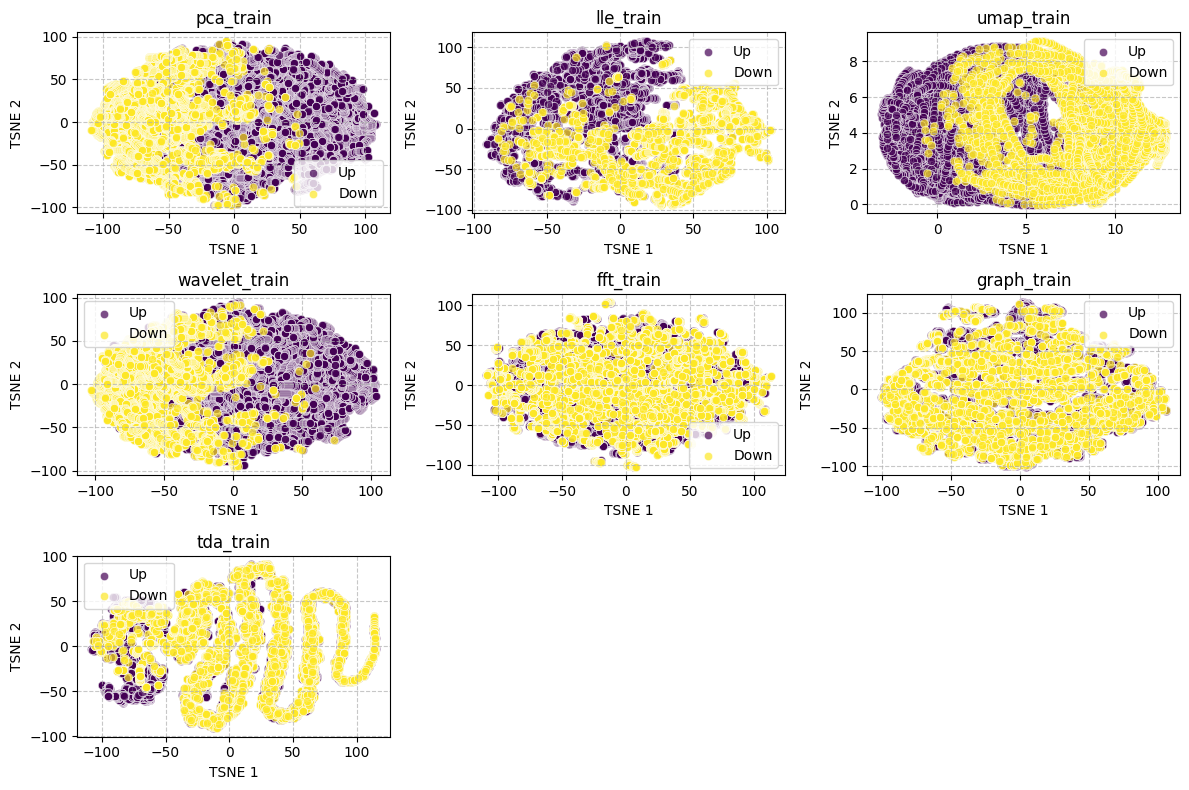

In [13]:
emb_list = [catalog.load(name) for name in emb_names]
fig = visualize_embeddings_grid(
    emb_list,
    emb_names,
    labels=labels,
    method='tsne',
    figsize=(12, 8)
)
plt.show()

[05/20/25 16:51:56] INFO     Loading data from pca_train (ParquetDataset)...                    ]8;id=656847;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=975411;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from lle_train (ParquetDataset)...                    ]8;id=528481;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=301386;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from umap_train (ParquetDataset)...                   ]8;id=52739;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=543203;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from wavelet_train (ParquetDataset)...                ]8;id=777755;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=724113;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from fft_train (ParquetDataset)...                    ]8;id=90968;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=947826;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from graph_train (ParquetDataset)...                  ]8;id=918844;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=144113;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from tda_train (ParquetDataset)...                    ]8;id=978642;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=14277;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

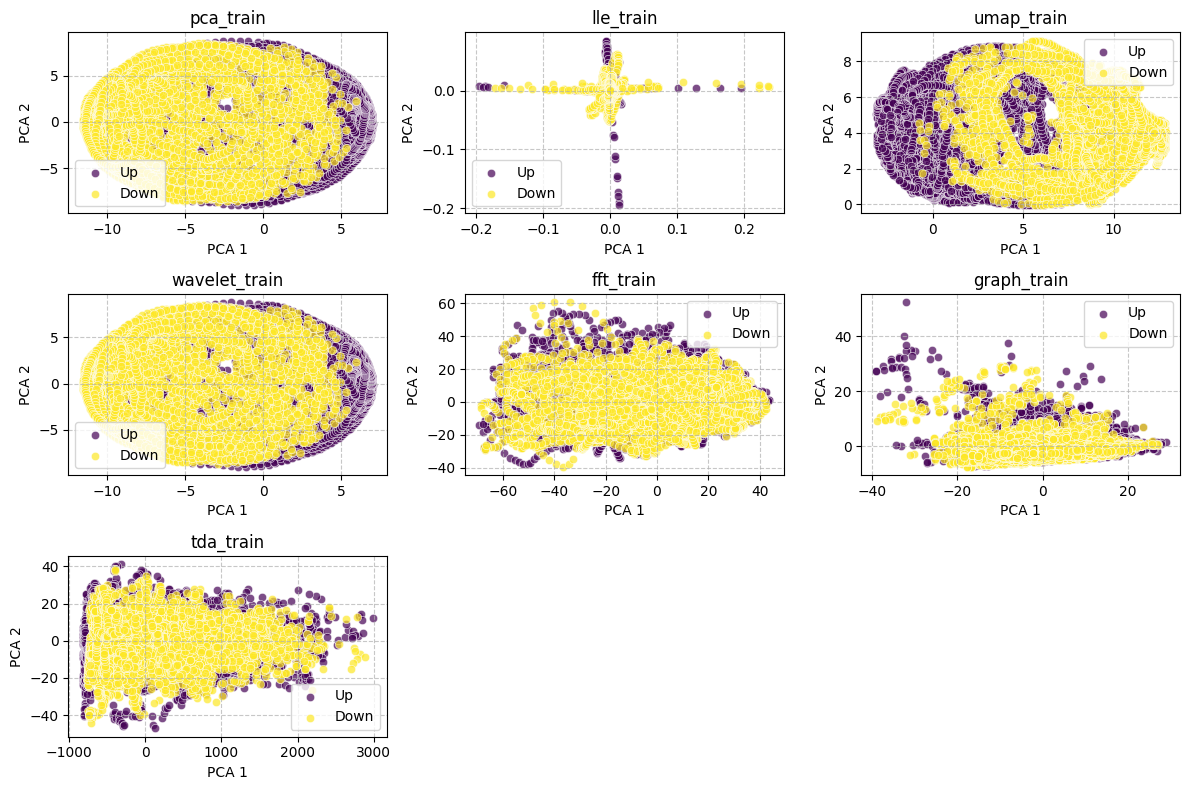

In [14]:
emb_list = [catalog.load(name) for name in emb_names]
fig = visualize_embeddings_grid(
    emb_list,
    emb_names,
    labels=labels,
    method='pca',
    figsize=(12, 8)
)
plt.show()

[05/20/25 16:52:23] INFO     Loading data from pca_train (ParquetDataset)...                    ]8;id=520691;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=847933;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from lle_train (ParquetDataset)...                    ]8;id=301199;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=939389;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from umap_train (ParquetDataset)...                   ]8;id=314665;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=305587;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from wavelet_train (ParquetDataset)...                ]8;id=897341;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=563795;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from fft_train (ParquetDataset)...                    ]8;id=929337;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=841724;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from graph_train (ParquetDataset)...                  ]8;id=122609;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=970350;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    INFO     Loading data from tda_train (ParquetDataset)...                    ]8;id=493503;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=544635;file:///Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#401\401]8;;\

                    WARNING  /Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/l ]8;id=112106;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=508834;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#109\109]8;;\
                             ib/python3.11/site-packages/sklearn/utils/deprecation.py:151:                         
                             FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite'                  
                             in 1.6 and will be removed in 1.8.                                                    
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/l ]8;id=120285;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=568853;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#109\109]8;;\
                             ib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs                   
                             value 1 overridden to 1 by setting random_state. Use no seed for                      
                             parallelism.                                                                          
                               warn(                                                                               
                                                                                                                   

[05/20/25 16:52:52] WARNING  /Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/l ]8;id=601938;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=180898;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#109\109]8;;\
                             ib/python3.11/site-packages/sklearn/utils/deprecation.py:151:                         
                             FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite'                  
                             in 1.6 and will be removed in 1.8.                                                    
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/l ]8;id=373322;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=257632;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#109\109]8;;\
                             ib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs                   
                             value 1 overridden to 1 by setting random_state. Use no seed for                      
                             parallelism.                                                                          
                               warn(                                                                               
                                                                                                                   

[05/20/25 16:53:00] WARNING  /Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/l ]8;id=910896;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=44979;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#109\109]8;;\
                             ib/python3.11/site-packages/sklearn/utils/deprecation.py:151:                         
                             FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite'                  
                             in 1.6 and will be removed in 1.8.                                                    
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/l ]8;id=924329;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=122078;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#109\109]8;;\
                             ib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs                   
                             value 1 overridden to 1 by setting random_state. Use no seed for                      
                             parallelism.                                                                          
                               warn(                                                                               
                                                                                                                   

[05/20/25 16:53:08] WARNING  /Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/l ]8;id=933151;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=52176;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#109\109]8;;\
                             ib/python3.11/site-packages/sklearn/utils/deprecation.py:151:                         
                             FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite'                  
                             in 1.6 and will be removed in 1.8.                                                    
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/l ]8;id=453872;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=743117;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#109\109]8;;\
                             ib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs                   
                             value 1 overridden to 1 by setting random_state. Use no seed for                      
                             parallelism.                                                                          
                               warn(                                                                               
                                                                                                                   

[05/20/25 16:53:17] WARNING  /Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/l ]8;id=976532;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=592419;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#109\109]8;;\
                             ib/python3.11/site-packages/sklearn/utils/deprecation.py:151:                         
                             FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite'                  
                             in 1.6 and will be removed in 1.8.                                                    
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/l ]8;id=782758;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=604993;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#109\109]8;;\
                             ib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs                   
                             value 1 overridden to 1 by setting random_state. Use no seed for                      
                             parallelism.                                                                          
                               warn(                                                                               
                                                                                                                   

[05/20/25 16:53:24] WARNING  /Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/l ]8;id=167337;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=117323;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#109\109]8;;\
                             ib/python3.11/site-packages/sklearn/utils/deprecation.py:151:                         
                             FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite'                  
                             in 1.6 and will be removed in 1.8.                                                    
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /Users/RoverHofman/Desktop/School/thesis/embedding-forecasting/.venv/l ]8;id=60822;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=64389;file:///Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py#109\109]8;;\
                             ib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs                   
                             value 1 overridden to 1 by setting random_state. Use no seed for                      
                             parallelism.                                                                          
                               warn(                                                                               
                                                                                                                   

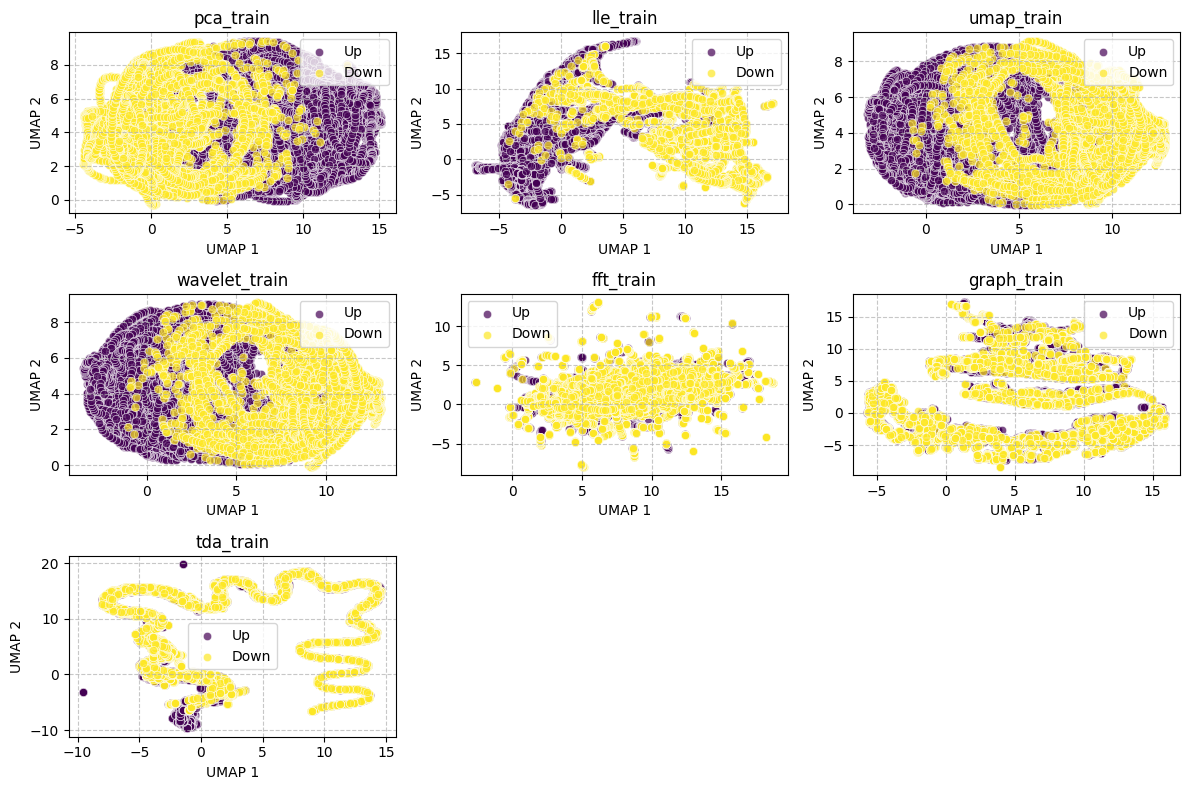

In [15]:
emb_list = [catalog.load(name) for name in emb_names]
fig = visualize_embeddings_grid(
    emb_list,
    emb_names,
    labels=labels,
    method='umap',
    figsize=(12, 8)
)
plt.show()